In [1]:
# K-means analysis of district-level consumption
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load the data from the CSV file
data = np.genfromtxt('../data/consumption.csv', delimiter=',', skip_header=1)

# Extract the labels from the header row
with open('../data/consumption.csv', 'r') as f:
    header = f.readline().rstrip().split(',')
labels = np.array(header[1:])
print('\n'.join(labels))

# Weight Latitude/Longitude
GEO_WEIGHT = .1
data[:,2] *= GEO_WEIGHT
data[:,3] *= GEO_WEIGHT

# Extract the float values into their own array
X = data[:, 2:]
A = data[:, 4:]


['Median Income' 'Latitude' 'Longitude' 'jowar' 'bajra' 'maize' 'barley'
 'small millets' 'ragi' 'ahrar' 'moong' 'masur' 'urd' 'peas' 'khesari'
 'other pulses' 'gram products' 'besan' 'other pulse products']
Median Income
Latitude
Longitude
jowar
bajra
maize
barley
small millets
ragi
ahrar
moong
masur
urd
peas
khesari
other pulses
gram products
besan
other pulse products


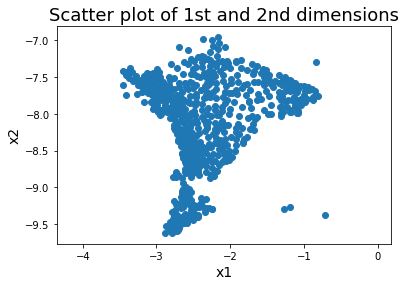

In [46]:
plt.scatter(-X[:,0],-X[:,1])
plt.title("Scatter plot of 1st and 2nd dimensions",size=18)
plt.xlabel("x1",size=14)
plt.ylabel("x2",size=14)
plt.axis("equal")
plt.show()

*Question:* Why do many districts have 0 consumption of many grains? For example, 70% of districts consume no jowar.

# PCA

In [47]:
from sklearn.decomposition import PCA
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X)

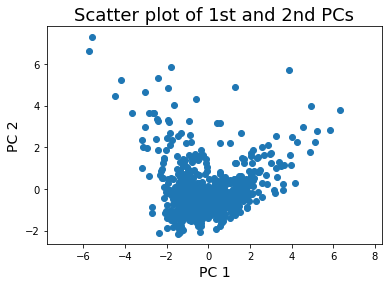

In [48]:
# Scatter Plot of 1st and 2nd PC's
plt.scatter(z[:,0],z[:,1])
plt.title("Scatter plot of 1st and 2nd PCs",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

5


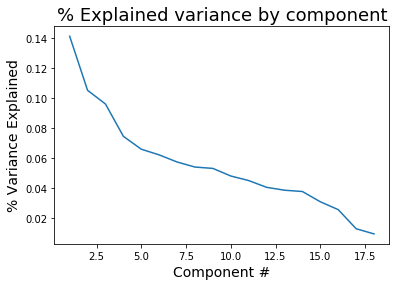

In [49]:
# Elbow plot of variance explanation
print(np.where(np.cumsum(pca.explained_variance_ratio_) >=.50)[0][0])
plt.plot(np.arange(1,19),pca.explained_variance_ratio_[0:100])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

At first glance, the PCA vizualization is not very informative. This suggests there is no natural grouping of district preferences, but an MDS might reveal something else.

It would also appear that a large number of factors explain variance. 5 factors explain ~50%, 15 factors explain ~85%

# MDS

In [50]:
from sklearn.manifold import MDS

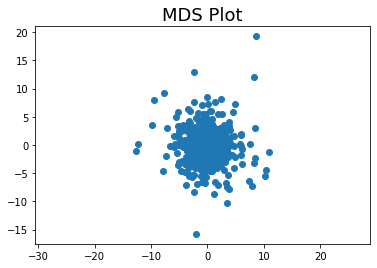

In [51]:
# mds = MDS(n_components=2,verbose=1,eps=1e-2)
# mds.fit(X)
# plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])
# plt.title("MDS Plot",size=18)
# plt.axis("equal")
# plt.show()

MDS is also uninformative! This is kind of a nail in the coffin, I reckon. No natural grouping.
# K means

In [52]:
from sklearn.cluster import KMeans

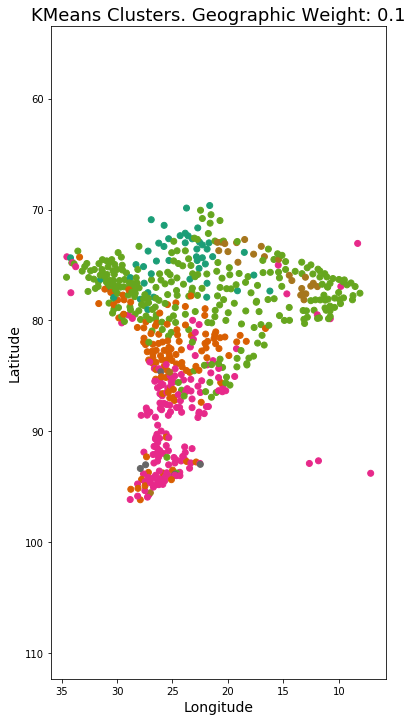

In [53]:
kmeans = KMeans(n_clusters=6,n_init=30)
y = kmeans.fit_predict(z)
plt.figure(figsize=(6, 12))
# plt.yticks(np.arange(-2, 4, 1))
plt.scatter(X[:,0]/GEO_WEIGHT,X[:,1]/GEO_WEIGHT,c=y, cmap="Dark2")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.title(f"KMeans Clusters. Geographic Weight: {GEO_WEIGHT}",size=18)
plt.xlabel("Longitude",size=14)
plt.ylabel("Latitude",size=14)
plt.axis("equal")
plt.show()

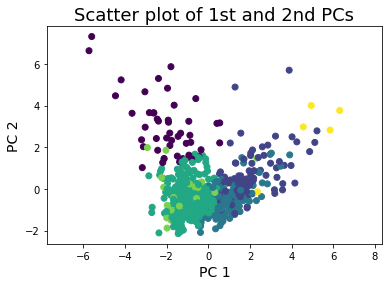

In [54]:
# PCA plot with clusters
plt.scatter(z[:,0],z[:,1], c=y)
plt.title("Scatter plot of 1st and 2nd PCs",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

In [55]:
# Write the clusters to new csv file
with open('consumption.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    rows = list(reader)

# add the "cluster" header to the last column
rows[0].append("cluster")

# add the "y" values to the last column of each row
for i in range(1, len(rows)):
    rows[i].append(y[i-1])

# open the output CSV file and write the rows
with open('consumption_with_clusters.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(rows)

TODO: Check out more on heirarchical clustering

It appears 4 clusters is the best approximation, and that there are geographic patterns.

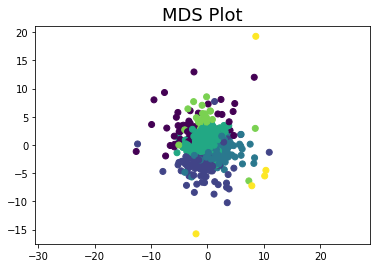

In [56]:
# Kmeans clustering, MDS plot
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1], c=y)
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

*note:* when I make it a dict, there's only 620 entries, suggesting duplicates. Confirmed in excel

# TODO


-could remove income
-get rid of rice/wheat, multicollinearity
-try the covariance matrix method from QMETH 450
-parallel plots AFTER finding the k-means clusters
